In [2]:
#imports here
import pandas as pd
import matplotlib.pyplot as plt
import datetime, pytz
#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

## Test-Train Split

Time series split on June 25th 2018

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


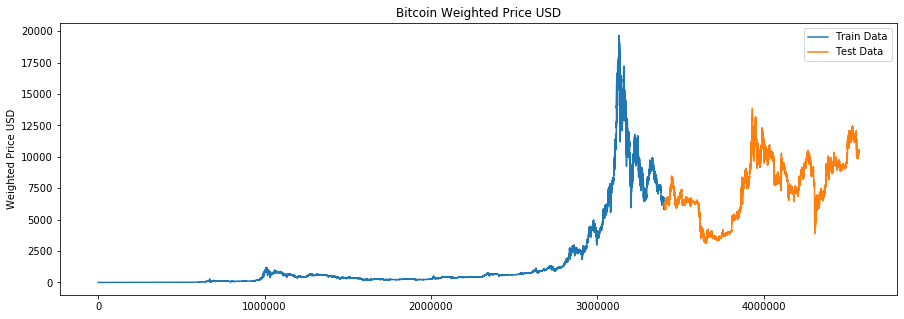

In [3]:
#plot test train data sets
df = pd.read_csv("../data/processed/bitstampUSD.csv")
train_data = df.loc[df["Timestamp"] <= 1529899200]
test_data = df.loc[df["Timestamp"] > 1529899200]

train_data = train_data["Weighted_Price"]
test_data = test_data["Weighted_Price"]

plt.figure(figsize=(15,5))
plt.plot(train_data)
plt.plot(test_data)
plt.title("Bitcoin Weighted Price USD")
plt.ylabel("Weighted Price USD")
plt.legend(["Train Data", "Test Data"])
plt.show()

## Predicted Output

In [4]:
test_data = test_data.reset_index()
#plot truth vs predicted serial vs predicted parallel
keras_pred = pd.read_csv("../data/predictions/keras_y_pred.csv")
elephas_pred = pd.read_csv("../data/predictions/elephas_y_pred.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


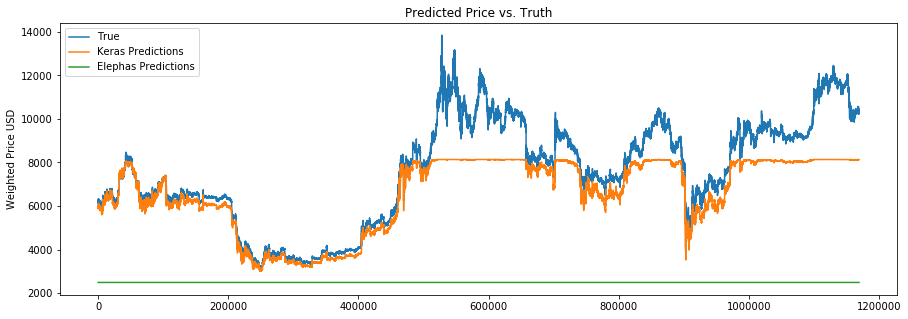

In [6]:
# test_data = test_data["Weighted_Price"]

plt.figure(figsize=(15,5))
plt.plot(test_data)
plt.plot(keras_pred)
plt.plot(elephas_pred)
plt.title("Predicted Price vs. Truth")
plt.ylabel("Weighted Price USD")
plt.legend(["True", "Keras Predictions", "Elephas Predictions"])
plt.show()

## Model Comparisons

- Plot time to fit comparison
- Plot MSE or MAE comparison

                              MSE          MAE    Fit Time
Model                                                     
keras                3.157021e+06  1221.644157  417.226720
elephas (4 workers)  3.111828e+07  5048.447754   99.671198


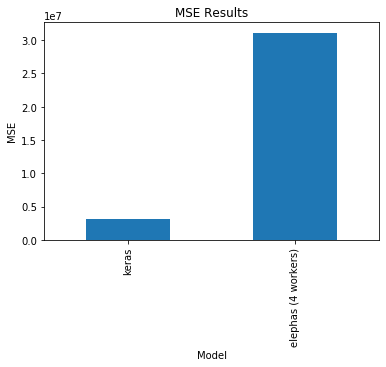

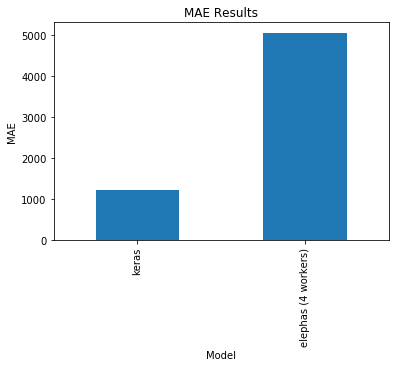

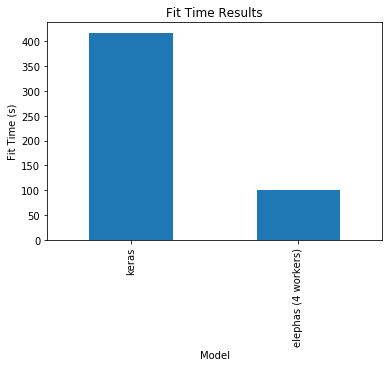

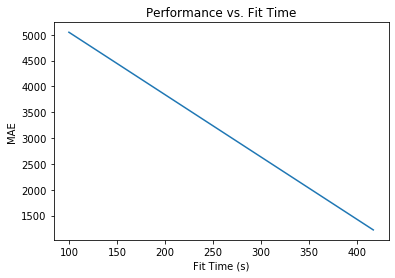

In [11]:
results_df = pd.read_csv("../data/predictions/results.csv")
results_df = results_df.set_index("Model")
print(results_df.head())

# plot error for each model
results_df['MSE'].plot(kind="bar")
plt.title("MSE Results")
plt.ylabel("MSE")
plt.show()

results_df['MAE'].plot(kind="bar")
plt.title("MAE Results")
plt.ylabel("MAE")
plt.show()

#plot fit time
results_df['Fit Time'].plot(kind="bar")
plt.title("Fit Time Results")
plt.ylabel("Fit Time (s)")
plt.show()

#plot fit time vs MAE
results_df.plot(x='Fit Time', y='MAE', legend=False)
plt.title("Performance vs. Fit Time")
plt.xlabel("Fit Time (s)")
plt.ylabel("MAE")
plt.show()